In [12]:
import os

from fastai.vision.all import *
from fastai.vision import *

import pandas as pd

In [15]:
DATASET_PATH = "E:/!classes/semester7/EHD img/OCT2017_/train/data"

In [17]:
class_names = []
for folder_name in os.listdir(DATASET_PATH):
    class_names.append(folder_name)
print(class_names)

['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [18]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATASET_PATH}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATASET_PATH}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)

In [19]:
df = pd.DataFrame(
    {
        'name': image_paths,
        'label': labels
    }
)

In [20]:
df.head()

,name,label
0,E:/!classes/semester7/EHD img/OCT2017_/train/data/CNV/CNV-1016042-1.jpeg,0
1,E:/!classes/semester7/EHD img/OCT2017_/train/data/CNV/CNV-1016042-10.jpeg,0
2,E:/!classes/semester7/EHD img/OCT2017_/train/data/CNV/CNV-1016042-100.jpeg,0
3,E:/!classes/semester7/EHD img/OCT2017_/train/data/CNV/CNV-1016042-101.jpeg,0
4,E:/!classes/semester7/EHD img/OCT2017_/train/data/CNV/CNV-1016042-102.jpeg,0


In [21]:
df.tail()

,name,label
83479,E:/!classes/semester7/EHD img/OCT2017_/train/data/NORMAL/NORMAL-9997680-2.jpeg,3
83480,E:/!classes/semester7/EHD img/OCT2017_/train/data/NORMAL/NORMAL-9997680-3.jpeg,3
83481,E:/!classes/semester7/EHD img/OCT2017_/train/data/NORMAL/NORMAL-9997680-4.jpeg,3
83482,E:/!classes/semester7/EHD img/OCT2017_/train/data/NORMAL/NORMAL-9997680-5.jpeg,3
83483,E:/!classes/semester7/EHD img/OCT2017_/train/data/NORMAL/NORMAL-9997680-6.jpeg,3


In [22]:
df.to_csv(
    path_or_buf=f'{DATASET_PATH}/labels.csv',
    index=False
)

In [23]:
dls = ImageDataLoaders.from_folder(
    path=DATASET_PATH,
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2
)

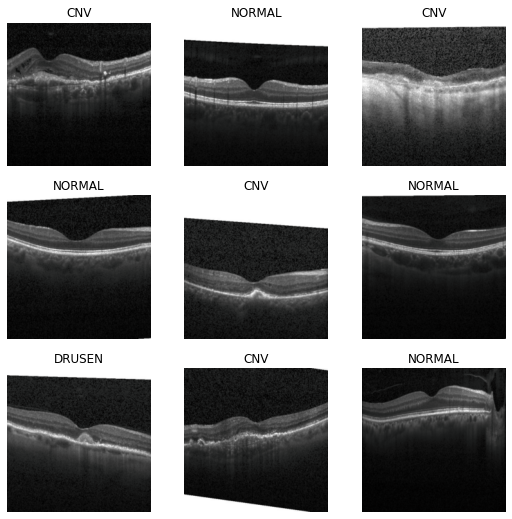

In [24]:
dls.show_batch()

In [25]:
model = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)

c:\python\python36\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\python\python36\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\Tanmay/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|█████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:06<00:00, 15.6MB/s]


In [26]:
model.fine_tune(
    epochs=1
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.289127,0.196553,0.933098,0.066902,1:00:38


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.142939,0.101247,0.965561,0.034439,22:46


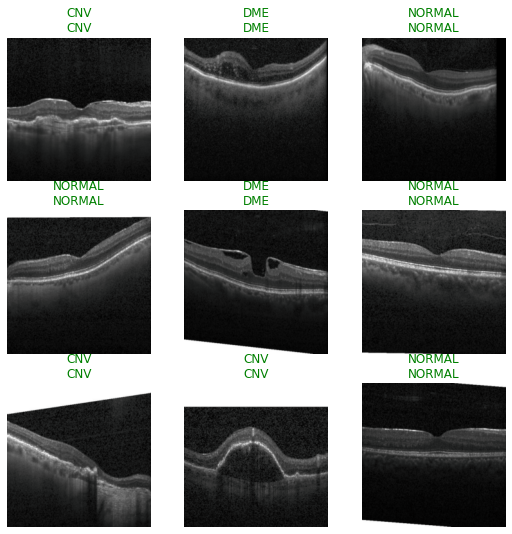

In [27]:
model.show_results()

In [28]:
model.export('fin_classifier.pkl')

In [29]:
"""
new_model = load_learner(f'{DATASET_PATH}/fruit_classifier.pkl')
new_model.predict(
    item='path/xyz.jpeg'
)
"""

"\nnew_model = load_learner(f'{DATASET_PATH}/fruit_classifier.pkl')\nnew_model.predict(\n    item='path/xyz.jpeg'\n)\n"

In [30]:
model.predict(item = 'E:/!classes/semester7/EHD img/OCT2017_/test/CNV/CNV-154835-2.jpeg')

('CNV',
 TensorBase(0),
 TensorBase([9.9958e-01, 1.1954e-04, 2.2541e-04, 7.8719e-05]))

In [31]:
model.predict(item = 'E:/!classes/semester7/EHD img/OCT2017_/test/DME/DME-30521-1.jpeg')

('DME',
 TensorBase(1),
 TensorBase([1.4761e-03, 9.9615e-01, 2.2988e-03, 7.5983e-05]))

In [32]:
model.predict(item = 'E:/!classes/semester7/EHD img/OCT2017_/test/DRUSEN/DRUSEN-2257047-1.jpeg')

('DRUSEN',
 TensorBase(2),
 TensorBase([2.8851e-02, 4.3092e-04, 9.6161e-01, 9.1045e-03]))

In [33]:
model.predict(item = 'E:/!classes/semester7/EHD img/OCT2017_/test/NORMAL/NORMAL-85367-1.jpeg')

('NORMAL',
 TensorBase(3),
 TensorBase([2.2371e-03, 1.0908e-04, 1.1736e-03, 9.9648e-01]))

In [34]:
model.summary()

Sequential (Input shape: 16 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     16 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     16 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     16 x 256 x 56 x 56  
Conv2d                                    16384      True      
BatchNorm2d                        

In [36]:
testarrDME = []
PATH_DME = 'E:/!classes/semester7/EHD img/OCT2017_/test/DME/'
test01 = os.listdir('E:/!classes/semester7/EHD img/OCT2017_/test/DME/')

for image in test01:
    testarrDME.append(str(model.predict(item = f'{PATH_DME}/{image}')))
print(testarrDME[0])

["('DME', TensorBase(1), TensorBase([0.0033, 0.9907, 0.0050, 0.0011]))", "('DME', TensorBase(1), TensorBase([4.3104e-04, 9.9685e-01, 2.4294e-03, 2.8483e-04]))", "('DME', TensorBase(1), TensorBase([8.8409e-04, 9.9486e-01, 3.9284e-03, 3.2830e-04]))", "('DME', TensorBase(1), TensorBase([7.0828e-04, 9.9432e-01, 4.1599e-03, 8.0956e-04]))", "('DME', TensorBase(1), TensorBase([3.5111e-03, 9.9289e-01, 2.7962e-03, 8.0059e-04]))", "('DME', TensorBase(1), TensorBase([0.0308, 0.9443, 0.0227, 0.0022]))", "('DME', TensorBase(1), TensorBase([3.6900e-03, 9.8685e-01, 9.1262e-03, 3.3661e-04]))", "('DME', TensorBase(1), TensorBase([3.2818e-03, 9.9552e-01, 1.0131e-03, 1.8112e-04]))", "('DME', TensorBase(1), TensorBase([0.0156, 0.9794, 0.0030, 0.0020]))", "('DME', TensorBase(1), TensorBase([0.0016, 0.9867, 0.0091, 0.0027]))", "('DME', TensorBase(1), TensorBase([4.2659e-04, 9.9481e-01, 3.8495e-03, 9.1256e-04]))", "('DME', TensorBase(1), TensorBase([2.4389e-01, 7.4546e-01, 9.9448e-03, 7.0519e-04]))", "('DME'

In [42]:
for i in range(242):
    if testarrDME[i][3] != 'M':
        print(testarrDME[i])

('CNV', TensorBase(0), TensorBase([8.7043e-01, 1.2203e-01, 7.1372e-03, 3.9780e-04]))
('CNV', TensorBase(0), TensorBase([0.7632, 0.2214, 0.0146, 0.0008]))
('CNV', TensorBase(0), TensorBase([0.7043, 0.2770, 0.0164, 0.0023]))
('CNV', TensorBase(0), TensorBase([0.6361, 0.3486, 0.0038, 0.0115]))


In [47]:
testarrDRUSEN = []
PATH_DRUSEN = 'E:/!classes/semester7/EHD img/OCT2017_/test/DRUSEN/'
test02 = os.listdir('E:/!classes/semester7/EHD img/OCT2017_/test/DRUSEN/')

for image in test02:
    testarrDRUSEN.append(str(model.predict(item = f'{PATH_DRUSEN}/{image}')))

In [48]:
for i in range(242):
    if testarrDRUSEN[i][3] != 'R':
        print(testarrDRUSEN[i])

('CNV', TensorBase(0), TensorBase([0.8830, 0.0017, 0.1140, 0.0013]))
('CNV', TensorBase(0), TensorBase([5.8986e-01, 3.0699e-04, 4.0957e-01, 2.5433e-04]))
('CNV', TensorBase(0), TensorBase([9.5051e-01, 4.0801e-04, 4.6152e-02, 2.9262e-03]))
('CNV', TensorBase(0), TensorBase([0.5119, 0.0006, 0.4864, 0.0012]))


In [53]:
testarrCNV = []
PATH_CNV = 'E:/!classes/semester7/EHD img/OCT2017_/test/NORMAL/'
test03 = os.listdir('E:/!classes/semester7/EHD img/OCT2017_/test/NORMAL/')

for image in test03:
    testarrCNV.append(str(model.predict(item = f'{PATH_CNV}/{image}')))

In [54]:
for i in range(242):
    if testarrCNV[i][3] != 'O':
        print(testarrCNV[i])
print(testarrCNV[0])

('NORMAL', TensorBase(3), TensorBase([2.6369e-04, 4.7464e-05, 1.6007e-03, 9.9809e-01]))
